<a href="https://colab.research.google.com/github/Shubha012/CreditCardFraud/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [59]:
data = pd.read_csv('creditcard.csv')

In [60]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [61]:
data.sample(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140654,83850.0,-7.167879,4.406653,-0.562771,-0.024734,-3.771747,0.552546,-2.050317,1.101042,3.769226,...,-0.401288,-1.156804,0.233003,0.285529,1.523156,0.039302,2.279680,1.825557,50.00,0
11723,20042.0,-0.715331,0.325309,2.651436,-1.740381,-0.265524,-0.222984,0.284107,-0.060393,2.678358,...,-0.137420,0.143911,-0.326765,0.005429,0.366174,-0.810018,-0.072886,-0.156745,11.85,0
184589,126301.0,2.129995,-1.076951,-0.405464,-0.783722,-1.340357,-0.799486,-1.062775,-0.017871,0.344795,...,-0.055201,-0.241941,0.395549,-0.157235,-0.566403,-0.473127,0.002479,-0.042863,22.48,0
125030,77512.0,-1.106307,0.808940,1.562834,-0.208697,0.783888,0.005091,0.807049,0.155900,-0.782248,...,0.152822,0.281488,-0.369684,-0.320264,0.625148,-0.390749,-0.106907,0.080754,27.00,0
241181,150915.0,1.855071,-0.600779,-0.480741,0.338283,-0.493029,0.174343,-0.675982,0.176538,1.168718,...,0.305631,0.978257,0.084244,0.736086,-0.086109,-0.222728,0.024093,-0.034709,51.95,0
273013,165377.0,-3.617360,1.760947,-3.127011,-0.728001,-0.220947,1.096116,-1.395944,2.864199,-0.551824,...,0.080145,-0.316666,0.071379,-1.038712,0.208458,-0.035302,-0.986384,-0.613738,21.86,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [63]:
data.Class.unique()

array([0, 1])

In [64]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
v3 = data['V3']
for i in range(0, len(v3)):
  if pd.isna(v3[i]):
    print(i)

In [66]:
v3 = data['V12']
for i in range(0, len(v3)):
  if pd.isna(v3[i]):
    print(i)

In [67]:
data.loc[9964]

Time      14864.000000
V1           -1.747939
V2            3.712444
V3           -4.433956
V4            1.365442
V5            0.274492
V6           -0.576648
V7           -1.128151
V8            2.140932
V9            0.549529
V10          -1.343252
V11           1.876539
V12          -1.504591
V13           2.800176
V14          -0.830576
V15          -0.242115
V16           1.588417
V17           3.846684
V18           2.291723
V19          -0.323236
V20           0.104286
V21          -0.203323
V22          -0.443246
V23           0.256061
V24          -1.745987
V25          -0.047417
V26          -0.315724
V27           0.039689
V28          -0.087413
Amount        1.790000
Class         0.000000
Name: 9964, dtype: float64

In [68]:
data.drop([9964], inplace=True)

In [69]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

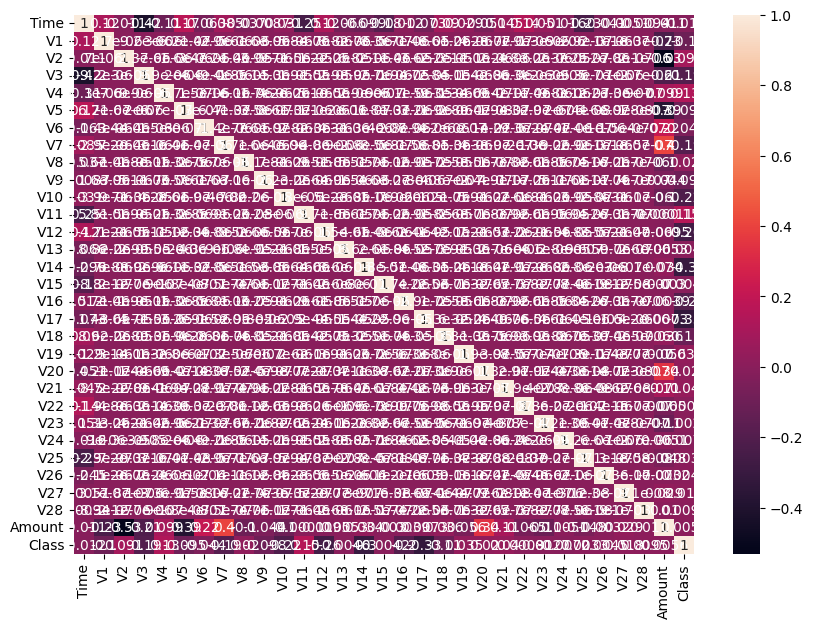

In [70]:
# what is heat map??????????
# and when to use
# what output it gives?

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

<ipython-input-71-050b6bf54c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='CMRmap')


Non-fraud transactions: 99.83%
Fraud transactions: 0.17%


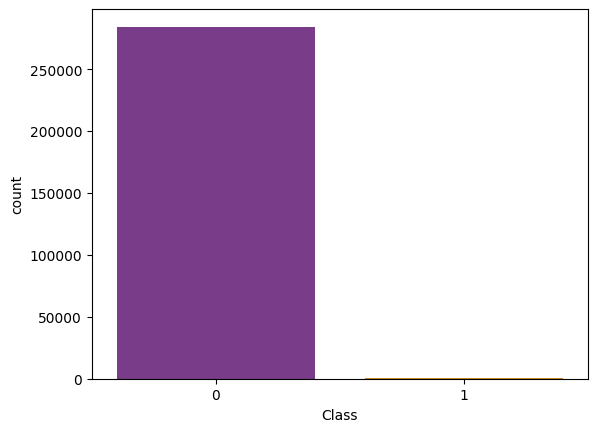

In [71]:
sns.countplot(x='Class', data=data, palette='CMRmap')
print('Non-fraud transactions: {}%'.format(round(data.Class.value_counts()[0]/len(data)*100.0,2)))
print('Fraud transactions: {}%'.format(round(data.Class.value_counts()[1]/len(data)*100.0,2)))

In [72]:
data.corr()['Class']

Time     -0.012323
V1       -0.101348
V2        0.091290
V3       -0.192964
V4        0.133448
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216884
V11       0.154877
V12      -0.260594
V13      -0.004569
V14      -0.302544
V15      -0.004223
V16      -0.196540
V17      -0.326492
V18      -0.111486
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [73]:
X = data.drop('Class', axis = 1)

In [74]:
y = data[['Class']]

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=0, shuffle=True)

In [76]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
240914,150806.0,1.919125,-0.483016,-0.175210,0.443473,-0.841282,-0.355453,-0.712288,0.090086,1.242635,...,-0.224362,0.250701,0.925525,0.118774,0.095816,-0.149623,-0.237904,0.035786,-0.045510,12.99
161146,113923.0,-0.361066,0.124422,0.423022,-0.836651,2.289354,4.262236,-0.542533,1.045480,0.153690,...,0.389501,0.240421,0.708474,-0.053219,0.630362,-0.576143,0.470822,0.022026,-0.032278,51.18
204521,135319.0,-1.635628,0.190823,-0.042933,-1.926723,1.403739,-1.775181,1.305257,-0.641480,-1.621059,...,-0.623723,-0.263745,0.163846,-0.960925,0.144301,1.332132,1.017021,-0.081181,-0.064023,28.00
182660,125498.0,1.978761,-0.328012,-0.296697,0.445833,-0.693200,-0.640777,-0.490496,-0.039635,1.339446,...,-0.254687,-0.182798,-0.384376,0.374775,-0.138684,-0.447002,-0.613566,0.035741,-0.032617,7.72
25118,33520.0,-0.296679,-0.552805,0.936677,-1.803092,0.124610,0.640182,-0.675772,0.088225,-2.839363,...,-0.009978,-0.062426,0.223417,-0.157351,-1.316366,-0.340896,-0.064115,0.039568,0.200258,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211544,138459.0,1.939310,-0.361127,-0.343017,0.364337,-0.397383,0.108273,-0.652166,0.181793,0.762251,...,-0.162175,-0.149204,-0.379639,0.439678,0.683868,-0.602071,-0.072521,-0.017469,-0.040955,9.99
86294,61167.0,1.130545,-0.108487,1.400971,1.228290,-1.029818,0.147353,-0.914703,0.318184,0.847194,...,-0.242689,0.258797,0.793137,-0.013960,0.055913,0.246625,-0.203796,0.084423,0.036021,0.00
122580,76616.0,-2.089968,2.118346,0.262500,1.181082,-1.387323,-0.510274,-0.831658,1.557344,-0.748506,...,-0.475302,0.072343,-0.266339,0.089360,0.388916,-0.119635,-0.521193,-0.724927,-0.135743,12.32
152316,97254.0,-1.009264,0.194830,2.737140,-0.275673,-0.096799,2.151921,-0.708065,0.593545,3.304328,...,0.260017,-0.212129,0.385944,-0.571812,-0.385034,0.719847,0.023317,0.297947,-0.032492,17.77


In [77]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183485,125821.0,0.622772,0.950072,1.583853,4.663714,-0.153032,0.873019,-0.071477,-0.008377,-0.851734,...,0.112545,0.204934,0.893373,0.020389,-0.025045,-0.833140,0.364112,-0.211483,-0.251627,13.04
255449,157235.0,-0.684747,0.884941,-1.177722,0.654581,0.774872,0.673327,1.333099,0.499758,-0.806394,...,0.254826,0.208157,0.352890,0.067813,-0.414188,0.179674,-0.358920,0.235106,0.175259,173.95
244750,152471.0,-5.156968,-1.607808,-1.848779,0.038747,2.059127,-1.301663,-1.272298,-0.135923,0.629376,...,-1.539254,0.184431,-1.099923,-2.199479,0.299299,-0.184449,-0.130725,0.504998,-0.404908,40.00
63920,50928.0,1.299454,0.246799,-0.223969,0.276545,0.299589,-0.008777,-0.053109,0.036430,-0.110035,...,-0.034154,-0.321794,-0.973391,-0.043709,-1.013445,0.351897,0.157808,-0.030334,0.007545,4.49
11476,19900.0,1.332274,-0.680875,0.558639,-0.268735,-1.055377,-0.350768,-0.861493,0.015399,1.178241,...,-0.153114,-0.164129,-0.230713,0.026842,-0.008550,0.381648,-0.247127,-0.013057,0.000423,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195999,131314.0,-4.134406,3.270374,-2.988649,-2.582392,-1.643058,-0.780956,-1.764542,3.204044,0.549031,...,-0.159341,0.218403,0.258010,0.130232,0.308691,0.390712,0.777002,0.031542,0.120221,1.00
208060,136954.0,-0.429484,1.562324,-0.778895,-1.192557,1.835248,-1.421243,1.566046,-0.340957,-0.395284,...,-0.120227,0.144977,0.520034,-0.580576,-0.851509,0.420111,-0.288269,0.137780,0.199415,1.00
260931,159780.0,1.948286,-0.659996,-0.254245,0.545140,-1.086310,-0.657674,-0.769749,0.053833,1.583362,...,-0.289833,0.149336,0.510557,0.174483,0.047798,-0.361403,0.570963,-0.036487,-0.047792,28.75
75126,55911.0,1.435913,-0.424190,-0.221868,-0.970364,-0.271849,-0.128155,-0.359229,-0.134411,-1.288769,...,-0.345776,-0.396090,-0.638097,-0.129919,-0.776571,0.437678,1.091244,-0.064374,-0.014072,12.90


In [78]:
y_train

,Class
240914,0
161146,0
204521,0
182660,0
25118,0
...,...
211544,0
86294,0
122580,0
152316,0


In [79]:
y_test

,Class
183485,0
255449,0
244750,0
63920,0
11476,0
...,...
195999,0
208060,0
260931,0
75126,0


In [83]:
from sklearn.linear_model import LogisticRegression
linearReg = LogisticRegression()
linearReg.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
y_pred = linearReg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy_score(y_test,y_pred)

0.9990402846375319